In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"llbbllbb2000","key":"fdb41d1d04370b1e7da17cc07797d944"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Oct 20 00:59 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle -v

     |████████████████████████████████| 58 kB 4.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=e4a626326a2d2835bdc1a55dcc39f7005f6cf19a56e8cbeec6c3541ce4a0400b
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
Kaggle API 1.5.12


In [ ]:
!kaggle competitions download -c histopathologic-cancer-detection -p '../content/cancer_detection'

100% 6.31G/6.31G [02:06<00:00, 38.3MB/s]
100% 6.31G/6.31G [02:06<00:00, 53.5MB/s]


In [ ]:
!unzip /content/cancer_detection/histopathologic-cancer-detection.zip

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, BatchNormalization, InputLayer, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np

import os
import matplotlib.image as mpig

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
data_dir = "train"  # data file
model_path = "model"   # path of saving model
df = pd.read_csv("train_labels.csv")

In [ ]:
num_sample = 80000
# data = pd.read_csv("train_labels.csv")
df_neg = df[df['label'] == 0].sample(num_sample, random_state = 42)
df_pos = df[df['label'] == 1].sample(num_sample, random_state = 42)

train_df = sklearn.utils.shuffle(pd.concat([df_neg, df_pos], axis = 0)).reset_index(drop = True)

In [ ]:
train_df.shape

(160000, 2)

In [ ]:
def get_images(df) :
    images = []
    for i in df:
        images.append(mpig.imread(data_dir + "/" + i + '.tif'))
    return np.array(images)

In [ ]:
train_images = get_images(train_df['id'])
train_labels = train_df['label'].values

In [ ]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (96, 96, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2),
    # Dropout(0.25),
    
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2),
    
    Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2),
    #Dropout(0.25),
    
    Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2),
    
    Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2),
    #Dropout(0.25),
    
    AveragePooling2D(pool_size = (3, 3), strides = 2),
    Dropout(0.7),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    #BatchNormalization(),
    Dropout(0.5),
        
    Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [ ]:
model.compile(optimizer='adam',
      loss="binary_crossentropy",
      metrics=['accuracy'])

In [ ]:
val_split = 0.2
epoch = 50
b_size = 128

model.fit(train_images, train_labels, epochs=epoch, batch_size = b_size, shuffle = True,
                    validation_split = val_split)

In [ ]:
model.save('./drive/MyDrive/CNNs.h5')

In [ ]:
model.save_weights('./drive/MyDrive/CNNs_weights.h5')

In [ ]:
model.save('./drive/MyDrive/CNNs')

INFO:tensorflow:Assets written to: ./drive/MyDrive/CNNs/assets


In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history = model.history

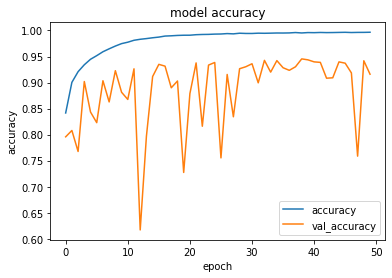

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc = 'lower right')
plt.savefig('./drive/MyDrive/model_accuracy.png')

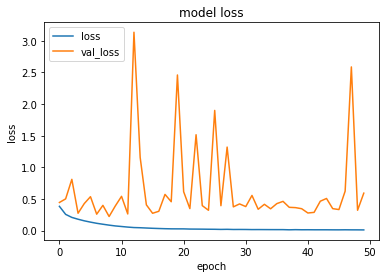

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['loss', 'val_loss'], loc = 'upper left')
plt.savefig('./drive/MyDrive/model_loss.png')

In [ ]:
test_number = 10000
test_df = df.sample(test_number).reset_index(drop = True)

In [ ]:
test_images = get_images(test_df['id'])
test_labels = test_df['label'].values

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.round(predictions)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true = test_labels, y_pred = np.round(predictions))

In [ ]:
def plot_confusion_matrix(cm, classes):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]) :
        plt.text(j, i, cm[i, j],horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


[[5912   41]
 [ 425 3622]]


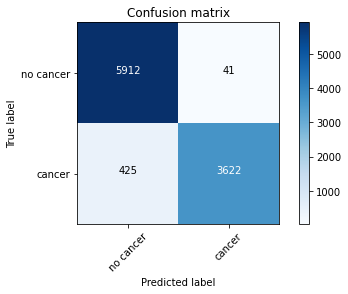

In [ ]:
plot_confusion_matrix(cm, ['no cancer', 'cancer'])
plt.savefig('./drive/MyDrive/confusion_matrix.png')

In [ ]:
!pip install pydot-ng & brew install graphviz

/bin/bash: brew: command not found


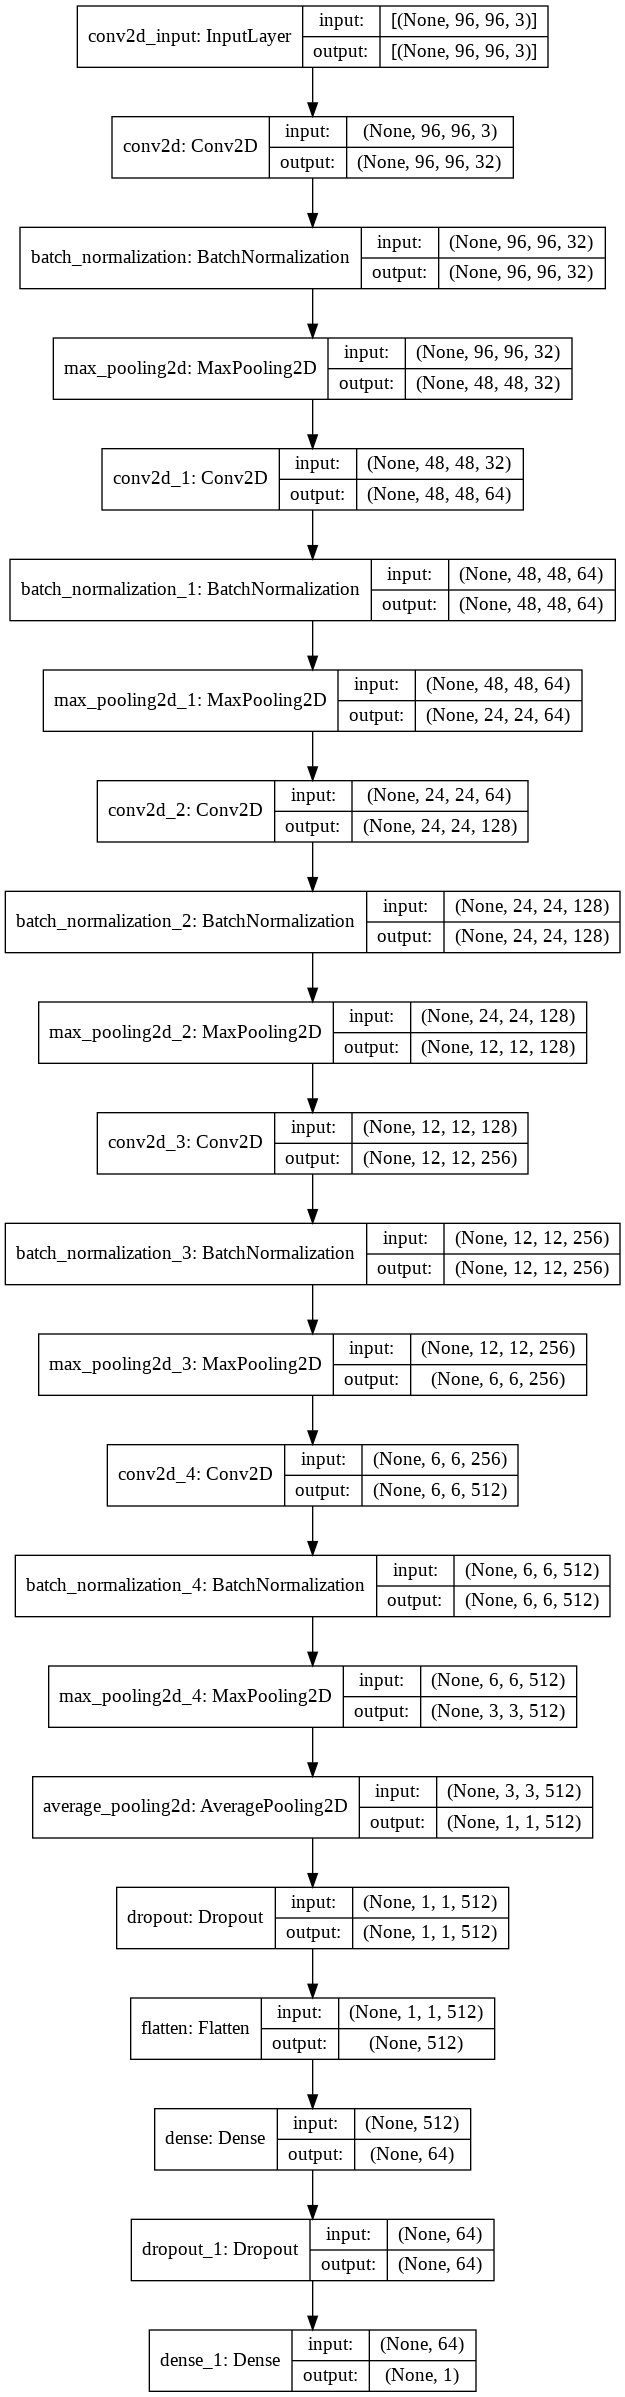

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='./drive/MyDrive/model.png', show_shapes = True)

In [ ]:
tmp_df = df.sample(1).reset_index(drop = True)
tmp_img = get_images(tmp_df['id'])

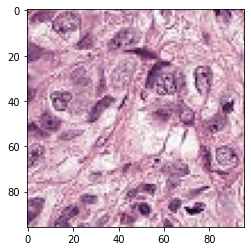

In [ ]:
plt.imshow(tmp_img[0])
plt.savefig('./drive/MyDrive/example/example.png')

In [ ]:
def dig_in(end_layer):
  tmp_model = Sequential()
  for layer in model.layers[:end_layer] :
    tmp_model.add(layer)
  tmp_result = tmp_model.predict(tmp_img)
  for _ in range(4) :
    show_img = tmp_result[0][:, :, _]
    plt.subplot(2, 2, _ + 1)
    plt.imshow(show_img, cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
  plt.savefig('./drive/MyDrive/example/example'+ str(end_layer) +'.png')

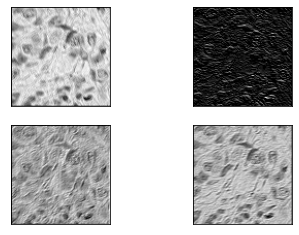

In [ ]:
dig_in(2)

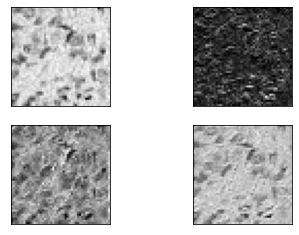

In [ ]:
dig_in(3)

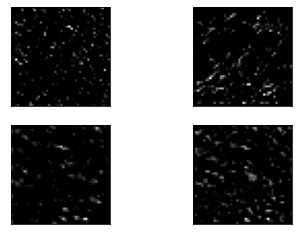

In [ ]:
dig_in(5)

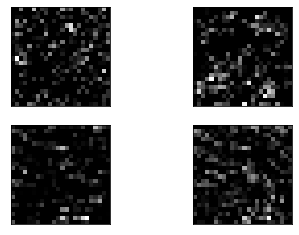

In [ ]:
dig_in(6)

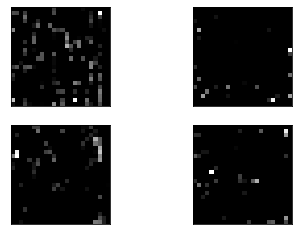

In [ ]:
dig_in(8)

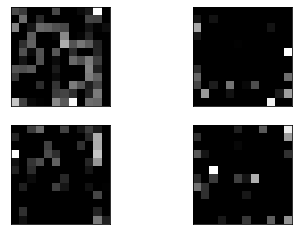

In [ ]:
dig_in(9)

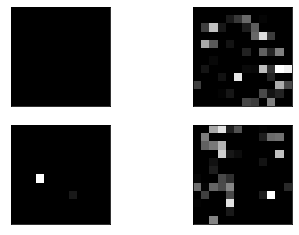

In [ ]:
dig_in(10)

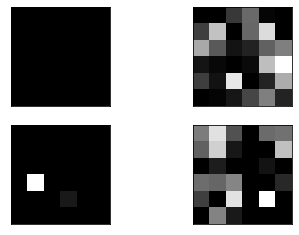

In [ ]:
dig_in(12)

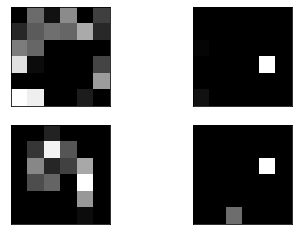

In [ ]:
dig_in(13)

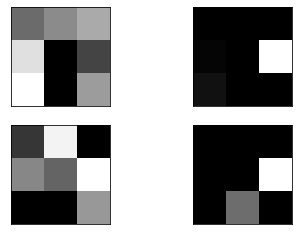

In [ ]:
dig_in(15)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7